# INTRODUCTION
### About the data:
Data was gathered from 552 participants in experimental speed dating events from 2002-2004. 
During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. 
At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: 
  - Attractiveness
  - Sincerity
  - Intelligence
  - Fun
  - Ambition
  - Shared Interests.
  
### The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: 
  - Demographics
  - Dating habits
  - Self-perception across key attributes
  - Beliefs on what others find valuable in a mate
  - Lifestyle information

![Alt img](https://i.imgur.com/SxThhJt.jpg)

In [321]:
# IMPORT PACKAGES
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
import statsmodels.api as sm


In [10]:
dating = pd.read_csv('Speed Dating Data.csv', encoding="ISO-8859-1")
dating.head()

iid   id  gender  idg  condtn  wave  round  position  positin1  order  \
0    1  1.0       0    1       1     1     10         7       NaN      4   
1    1  1.0       0    1       1     1     10         7       NaN      3   
2    1  1.0       0    1       1     1     10         7       NaN     10   
3    1  1.0       0    1       1     1     10         7       NaN      5   
4    1  1.0       0    1       1     1     10         7       NaN      7   

    ...    attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
0   ...        5.0      7.0       7.0     7.0     7.0      NaN      NaN   
1   ...        5.0      7.0       7.0     7.0     7.0      NaN      NaN   
2   ...        5.0      7.0       7.0     7.0     7.0      NaN      NaN   
3   ...        5.0      7.0       7.0     7.0     7.0      NaN      NaN   
4   ...        5.0      7.0       7.0     7.0     7.0      NaN      NaN   

   intel5_3  fun5_3  amb5_3  
0       NaN     NaN     NaN  
1       NaN     NaN     NaN  
2       NaN     NaN     NaN  
3       NaN     NaN     NaN  
4       NaN     NaN     NaN  

[5 rows x 195 columns]

In [57]:
dating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


## How old are these single people? :) 

Text(0,0.5,'Frequency')

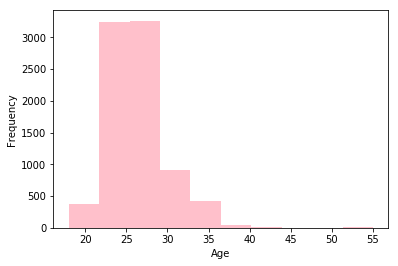

In [255]:
age = dating[np.isfinite(dating['age'])]['age']
plt.hist(age.values, facecolor = 'pink')
plt.xlabel('Age')
plt.ylabel('Frequency')

## Dating life : How often do these single participants go on a date?

![Alt img](https://i.imgur.com/uJxvX3i.jpg)

In [213]:
dating_frequency = dating['date'].value_counts()
dating_frequency

6.0    2094
4.0    2040
5.0    1528
7.0    1434
3.0     783
2.0     308
1.0      94
Name: date, dtype: int64

In [214]:
frequency_map = {
    1:'Several times a week',
    2:'Twice a week',
    3:'Once a week',
    4:'Twice a month',
    5:'Once a month',
    6:'Several times a year',
    7:'Almost never'
}

In [215]:
frequency_map[1]
def my_func(frequency):
    return frequency_map[frequency]
index3 = dating_frequency.index.map(my_func)
index3

Index(['Several times a year', 'Twice a month', 'Once a month', 'Almost never',
       'Once a week', 'Twice a week', 'Several times a week'],
      dtype='object')

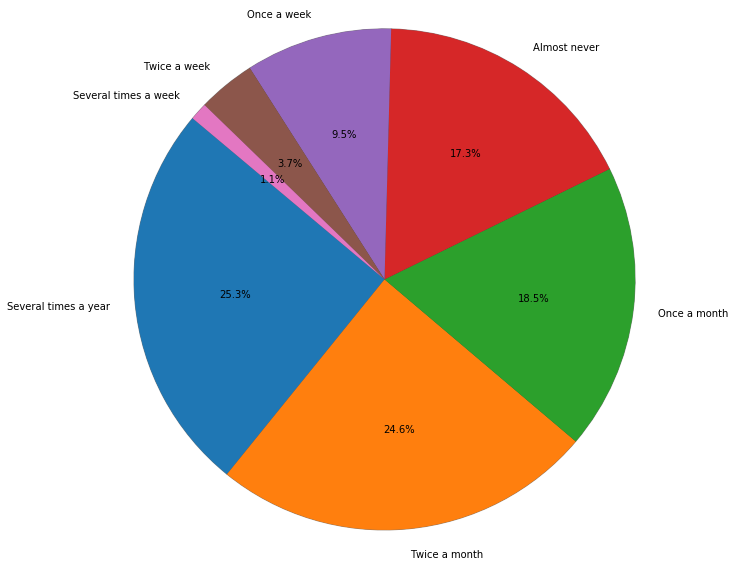

In [320]:
labels = index3
sizes = [2094, 2040, 1528, 1434, 783, 308, 94]
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', labeldistance=1.1, shadow=True, startangle=140, radius=3000) 
plt.axis('equal')
plt.show()

## What do participants expect from this event? 

In [227]:
top_5_goal = dating['goal'].value_counts().head()
top_5_goal


1.0    3426
2.0    3012
3.0     631
5.0     510
6.0     419
Name: goal, dtype: int64

In [104]:
goal_map = {
    1:'Seemed like a fun night out',
    2: 'To meet new people',
    3: 'To get a date',
    4: 'Looking for a serious relationship',
    5: 'To say I did it',
    6: 'Others'
}

In [105]:
goal_map[1]
def my_func(goal):
    return goal_map[goal]
index0 = top_5_goal.index.map(my_func)
index0

Index(['Seemed like a fun night out', 'To meet new people', 'To get a date',
       'To say I did it', 'Others'],
      dtype='object')

Text(0.5,1,'WHAT PARTICIPANTS EXPECT FROM THE EVENT')

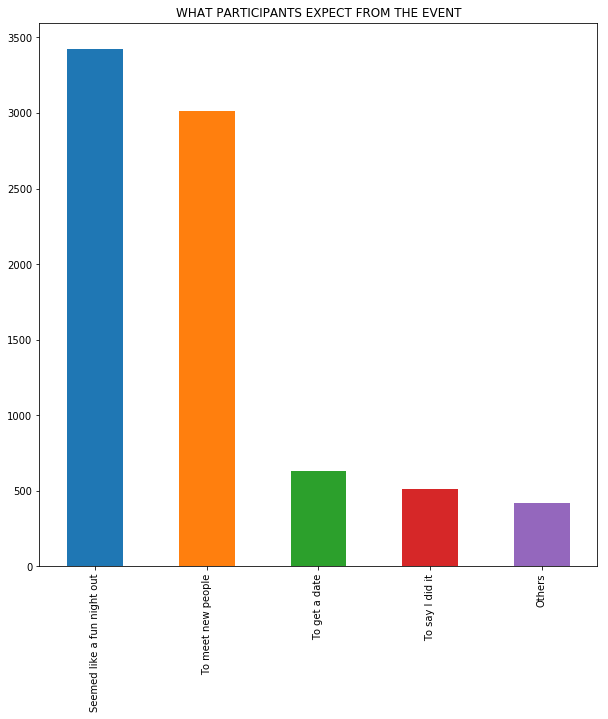

In [309]:
ax = top_5_goal.plot(kind='bar', figsize = (10,10))

ax.set_xticklabels(index0)
plt.title('WHAT PARTICIPANTS EXPECT FROM THE EVENT')

### How many people who wanted to find a date from the event found a match?

In [296]:
sum(dating['goal']==3)

631

In [303]:
sum(dating[dating['goal']==3]['match']==1)

100

In [308]:
100/631*100

15.847860538827257

#### 15,8 % of 'serious' people found their match

### How many people who came to the event JUST FOR FUN found a match?


In [305]:
sum(dating['goal']==1)

3426

In [310]:
sum(dating[dating['goal']==1]['match']==1)

583

In [311]:
583/3426*100

17.016929363689435

#### 17 % of 'looking-for-fun' people found their match from the event

##  Top 3 jobs that has the most YES for 'Would you like to see him/her again?'

![Alt Img](https://i.imgur.com/1gItfkx.gif)

In [94]:
yes_date = dating['dec_o']==1
yes_date
top_dating_career=dating[yes_date]['career_c'].value_counts().head(3)
top_dating_career

7.0    934
2.0    926
1.0    310
Name: career_c, dtype: int64

In [92]:
career_map = {
1: 'Lawyer', 
2:'Academic/Research',
3: ' Psychologist',
4: ' Doctor/Medicine',
5: 'Engineer', 
6: 'Creative Arts/Entertainment',
7: 'Banking/Consulting/CEO/Entrepreneur',
8: 'Real Estate',
9: 'International/Humanitarian Affairs',
10: 'Undecided',
11: 'Social Work',
12: 'Speech Pathology',
13: 'Politics',
14: 'Pro sports/Athletics',
15: 'Other',
16: 'Journalism',
17: 'Architecture'

}

In [95]:
career_map[1]
def my_func(career):
    return career_map[career]
index = top_dating_career.index.map(my_func)
index

Index(['Banking/Consulting/CEO/Entrepreneur', 'Academic/Research', 'Lawyer'], dtype='object')

Text(0.5,1,'TOP 3 JOBS THAT RECEIVE THAT MOST YES FROM PARTNERS')

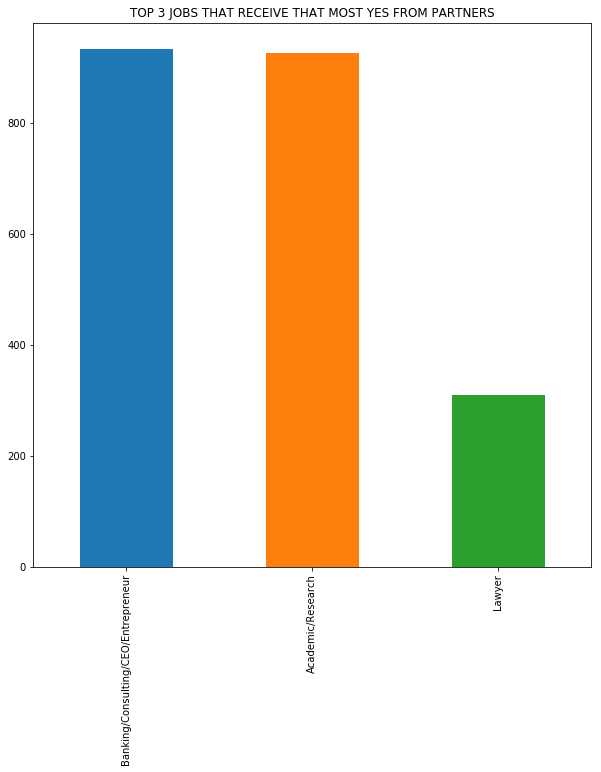

In [252]:
ax = top_dating_career.plot(kind='bar', figsize = (10,10))
# plt.xticks(top_dating_career.index,index)
ax.set_xticklabels(index)
plt.title('TOP 3 JOBS THAT RECEIVE THAT MOST YES FROM PARTNERS')

### Are women who love reading more attractive to men than those who love shopping?

![Alt Img](https://i.imgur.com/UQcALpS.jpg)

In [385]:
love_shopping = (dating[dating['shopping']==10]['gender']==0).value_counts()
love_shopping

True     406
False    168
Name: gender, dtype: int64

In [401]:
liked_women = (dating[dating['dec_o']==1]['gender']==0).value_counts()
liked_women

True     1986
False    1529
Name: gender, dtype: int64

In [393]:
406/1986*100

20.44310171198389

In [397]:
love_reading = (dating[dating['reading']==10]['gender']==0).value_counts()
love_reading

True     877
False    501
Name: gender, dtype: int64

In [399]:
877/1986*100

44.15911379657603

### Among those women that were desired by their partner, 20% belong to the shopping lovers group, while 44% of them are reading lovers!



## How likely you're gonna be 'heart-broken'? ( when you like someone but they don't like you back)

![Alt img](https://i.imgur.com/AVoCBnV.jpg)

In [60]:
broken_heart_count = len(dating[(dating['dec_o']==0) & (dating['dec']==1)]) 
+ len(dating[(dating['dec_o']==1) & (dating['dec']==0)])
perc_broken_heart = broken_heart_count / len(dating.index)
perc_broken_heart*100

25.51921699689663

In [415]:
sum((dating['prob']>5)&(dating['dec_o']==0))

1852

In [417]:
over_confidence = 1852/8377*100
over_confidence

22.108153276829416

## Did the event help these single people find their match?

In [411]:
found_crush = sum(dating['match']==1)
found_crush/8378*100

16.47171162568632

## Did participants receive a call from their date after the event? 

![Alt img](https://i.imgur.com/Hqn575l.jpg)

In [412]:
call_me_maybe = sum(dating['them_cal']>0)
call_me_maybe/8377*100

23.862958099558316

### Calling rate (almost 24%) is higher than matching rate (16%)! 

### So I wonder is there some weird people who rejected their partner and then called them up later?

In [418]:
sum((dating['dec_o']==0)&(dating['them_cal']>0))

995

### There is... around 12% of the cases




# Clean data before Modeling


In [124]:
dating2 = dating.isnull().sum()
dating2 = dating2.sort_values()

In [134]:
dating_x = dating2[dating2 < 1000].index

In [139]:

dating_cl = dating[dating_x]
dating_cl.head()

iid  dec_o  samerace  match  partner  order  position  dec  wave  condtn  \
0    1      0         0      0        1      4         7    1     1       1   
1    1      0         0      0        2      3         7    1     1       1   
2    1      1         1      1        3     10         7    1     1       1   
3    1      1         0      1        4      5         7    1     1       1   
4    1      1         0      1        5      7         7    1     1       1   

     ...     satis_2  length  sinc3_2  attr3_2  intel1_2  sinc1_2 amb3_2  \
0    ...         6.0     2.0      7.0      6.0     13.89    16.67    6.0   
1    ...         6.0     2.0      7.0      6.0     13.89    16.67    6.0   
2    ...         6.0     2.0      7.0      6.0     13.89    16.67    6.0   
3    ...         6.0     2.0      7.0      6.0     13.89    16.67    6.0   
4    ...         6.0     2.0      7.0      6.0     13.89    16.67    6.0   

   fun3_2  attr1_2  numdat_2  
0     7.0    19.44       1.0  
1     7.0    19.44       1.0  
2     7.0    19.44       1.0  
3     7.0    19.44       1.0  
4     7.0    19.44       1.0  

[5 rows x 101 columns]

In [145]:
dating_cl = dating_cl.dropna()

In [146]:
dating_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5519 entries, 30 to 8374
Columns: 101 entries, iid to numdat_2
dtypes: float64(85), int64(13), object(3)
memory usage: 4.3+ MB


In [148]:
dating_cl.select_dtypes(include='object')
dating_final = dating_cl.drop(columns = ['field','from','career'])

# Build and Evaluate Model

In [323]:
X = dating_final.drop(columns=['match','dec','dec_o','like_o'])
y = dating_final['match']

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

### Rogistic Regression

In [325]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [326]:
prediction = model.predict(X_test)

In [327]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [328]:
confusion_matrix(y_test, prediction)

array([[851,  50],
       [138,  65]], dtype=int64)

In [329]:
report = classification_report(y_test, prediction)
print(report)

             precision    recall  f1-score   support

          0       0.86      0.94      0.90       901
          1       0.57      0.32      0.41       203

avg / total       0.81      0.83      0.81      1104



### Decision Tree 

In [330]:
from sklearn.tree import DecisionTreeClassifier 

In [331]:
dtc = DecisionTreeClassifier()

In [332]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [333]:
prediction2 = dtc.predict(X_test)

In [334]:
matrix = confusion_matrix(y_test, prediction2)
report = classification_report(y_test, prediction2)
print(matrix)
print(report)

[[753 148]
 [121  82]]
             precision    recall  f1-score   support

          0       0.86      0.84      0.85       901
          1       0.36      0.40      0.38       203

avg / total       0.77      0.76      0.76      1104



### Random Forest

In [336]:
rf = RandomForestClassifier(random_state=101)
rf.fit(X_train, y_train)
prediction3 = rf.predict(X_test)
matrix = confusion_matrix(y_test, prediction3)
report = classification_report(y_test, prediction3)
print(matrix)
print(report)


[[868  33]
 [173  30]]
             precision    recall  f1-score   support

          0       0.83      0.96      0.89       901
          1       0.48      0.15      0.23       203

avg / total       0.77      0.81      0.77      1104



# CONCLUSION

![Alt img](https://i.imgur.com/X1wPhI4.jpg)

### Scientifically speaking, you gotta meet/date at least 6 people to find out one person you want to meet again or to keep dating


### If you're working in consulting, marketing, banking or being an entrepreneur/CEO, chances are people will be much more attracted to you

### People might call you even though they don't really like you...

### If you're a woman who love reading, you have more than double success rate to find someone who likes you then women who love shopping

### If you like someone and not so sure about their feeling for you, GO FOR IT! Because scientifically, 75% chance that they  like you too! 

![Alt img](https://i.imgur.com/yKxuFeL.jpg)